   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


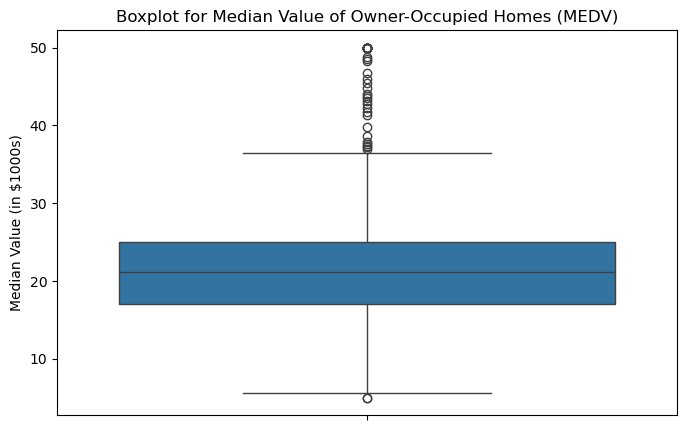

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Boston Housing dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

# Display the first few rows of the dataset to understand its structure
print(boston_df.head())

# 1. Boxplot for "Median value of owner-occupied homes" (MEDV)
plt.figure(figsize=(8, 5))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot for Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("Median Value (in $1000s)")
plt.show()



In [ ]:
Boxplot for MEDV:
Highlights the spread and potential outliers in the median value of homes.

C:\Users\Khushi\AppData\Local\Temp\ipykernel_30368\240306386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chas_counts.index, y=chas_counts.values, palette="viridis")


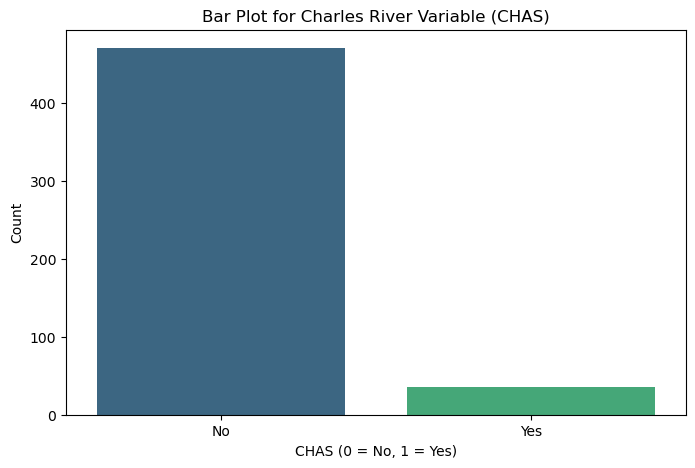

In [6]:
# 2. Bar plot for Charles River variable (CHAS)
chas_counts = boston_df['CHAS'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=chas_counts.index, y=chas_counts.values, palette="viridis")
plt.title("Bar Plot for Charles River Variable (CHAS)")
plt.xlabel("CHAS (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])  # Labeling the CHAS categories
plt.show()

In [ ]:
Bar Plot for CHAS:
Displays the count of homes near (CHAS = 1) or not near (CHAS = 0) the Charles River.

C:\Users\Khushi\AppData\Local\Temp\ipykernel_30368\2406649141.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AGE_Group", y="MEDV", data=boston_df, palette="Set2")


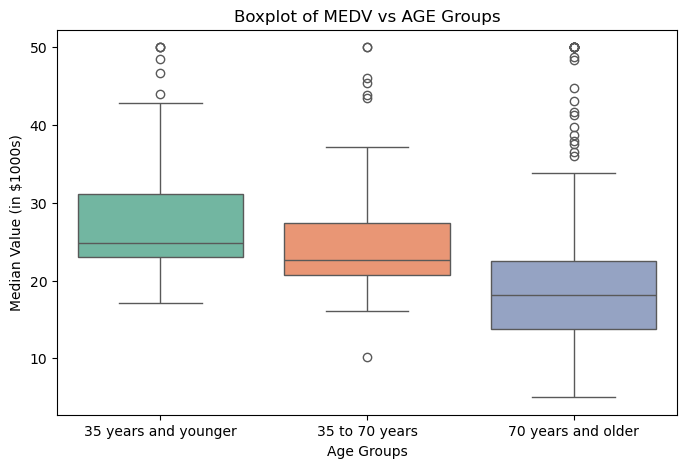

In [8]:
# 3. Boxplot for MEDV vs AGE (Discretized AGE)
bins = [0, 35, 70, 100]
labels = ["35 years and younger", "35 to 70 years", "70 years and older"]
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
sns.boxplot(x="AGE_Group", y="MEDV", data=boston_df, palette="Set2")
plt.title("Boxplot of MEDV vs AGE Groups")
plt.xlabel("Age Groups")
plt.ylabel("Median Value (in $1000s)")
plt.show()

In [ ]:
Boxplot for MEDV vs AGE Groups:
Compares the distribution of median home values across three age categories:
≤35 years
35–70 years
≥70 years.

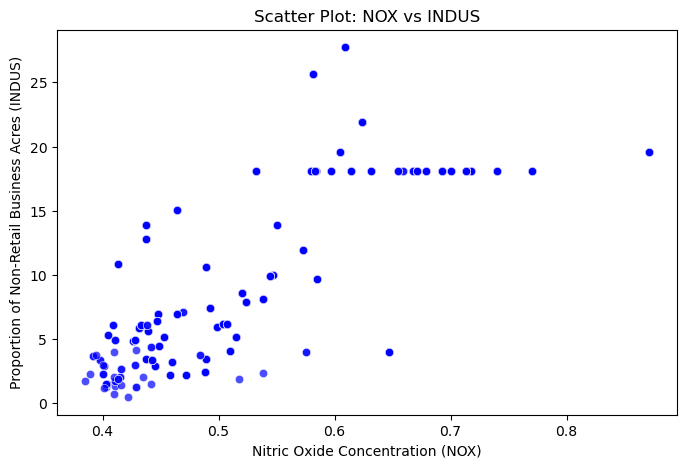

Observation: Higher nitric oxide concentrations are associated with a higher proportion of non-retail business acres, showing a positive relationship.


In [10]:
# 4. Scatter plot for NOX vs INDUS
plt.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'], alpha=0.7, color="b")
plt.title("Scatter Plot: NOX vs INDUS")
plt.xlabel("Nitric Oxide Concentration (NOX)")
plt.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.show()
print("Observation: Higher nitric oxide concentrations are associated with a higher proportion of non-retail business acres, showing a positive relationship.")

In [ ]:
Scatter Plot for NOX vs INDUS:
Shows the relationship between nitric oxide concentration (NOX) and the proportion of non-retail business acreage (INDUS).

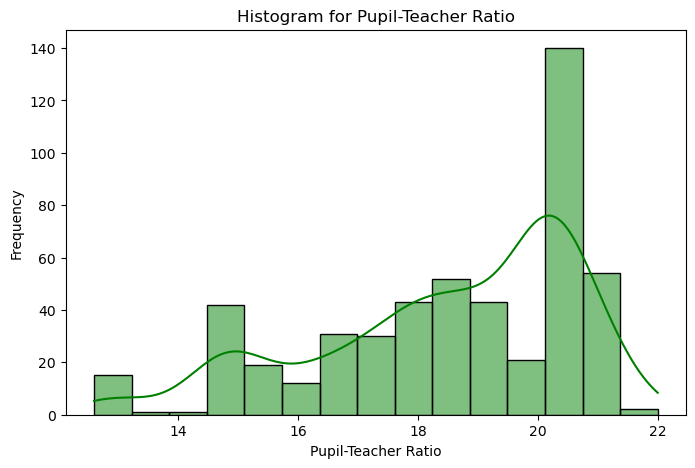

In [12]:
# 5. Histogram for Pupil-Teacher Ratio (PTRATIO)
plt.figure(figsize=(8, 5))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True, color="g")
plt.title("Histogram for Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

In [ ]:
Histogram for PTRATIO:
Depicts the distribution of pupil-to-teacher ratios across towns.

In [ ]:
1. T-test for Independent Samples: Is there a significant difference in the median value of houses bounded by the Charles River or not?
Hypothesis:
Null Hypothesis (H₀): There is no significant difference in the median value of houses bounded by the Charles River (CHAS=1) and not bounded by the Charles River (CHAS=0).
Alternative Hypothesis (H₁): There is a significant difference in the median value of houses between the two groups.

In [18]:
from scipy.stats import ttest_ind

# Split the data into two groups based on CHAS
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the T-test
t_stat, p_value = ttest_ind(chas_1, chas_0, equal_var=False)  # Assume unequal variances
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median value of houses.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median value of houses.")


T-statistic: 3.113291312794837, P-value: 0.0035671700981375174
Reject the null hypothesis: There is a significant difference in median value of houses.


In [ ]:
2. ANOVA: Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)?
Hypothesis:
Null Hypothesis (H₀): There is no difference in the median value of houses (MEDV) across different AGE groups.
Alternative Hypothesis (H₁): There is a difference in the median value of houses (MEDV) across AGE groups.

In [20]:
from scipy.stats import f_oneway

# Discretize AGE into three groups
bins = [0, 35, 70, 100]
labels = ["35 years and younger", "35 to 70 years", "70 years and older"]
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Perform ANOVA
group_1 = boston_df[boston_df['AGE_Group'] == "35 years and younger"]['MEDV']
group_2 = boston_df[boston_df['AGE_Group'] == "35 to 70 years"]['MEDV']
group_3 = boston_df[boston_df['AGE_Group'] == "70 years and older"]['MEDV']

f_stat, p_value = f_oneway(group_1, group_2, group_3)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values of houses across AGE groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median values of houses across AGE groups.")


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference in median values of houses across AGE groups.


In [ ]:
3. Pearson Correlation: Is there a relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)?
Hypothesis:
Null Hypothesis (H₀): There is no relationship between NOX and INDUS.
Alternative Hypothesis (H₁): There is a relationship between NOX and INDUS.

In [22]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between NOX and INDUS.")


Pearson Correlation: 0.7636514469209162, P-value: 7.913361061232958e-98
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.


In [ ]:
4. Regression Analysis: Impact of Weighted Distance to Employment Centers (DIS) on Median Home Value (MEDV)?
Hypothesis:
Null Hypothesis (H₀): Weighted distance (DIS) has no impact on MEDV.
Alternative Hypothesis (H₁): Weighted distance (DIS) has an impact on MEDV.

In [24]:
import statsmodels.api as sm

# Define the independent (DIS) and dependent (MEDV) variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()
print(model.summary())

# Conclusion
print("Interpret the p-value of the DIS coefficient:")
if model.pvalues['DIS'] < 0.05:
    print("Reject the null hypothesis: Weighted distance (DIS) has a significant impact on MEDV.")
else:
    print("Fail to reject the null hypothesis: Weighted distance (DIS) has no significant impact on MEDV.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        00:07:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [ ]:
Summary of Tests:

T-Test: Tests for a significant difference in median house value (MEDV) based on proximity to the Charles River (CHAS).

ANOVA: Examines if median house values differ across discrete age groups (AGE).

Pearson Correlation: Evaluates the relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

Regression Analysis: Assesses the effect of weighted distances to employment centers (DIS) on house median value (MEDV).